Importing the neccessary libraries that we need for this project work


In [41]:
import pandas as pd
import seaborn as sns
import numpy as np

In [42]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading covid-19 dataset


In [43]:
df = pd.read_csv(r'/content/drive/MyDrive/Covid_19_Analysis/covid_19_data.csv')

In [44]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


shape and info of dataset

In [45]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85638 entries, 0 to 85637
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              85638 non-null  int64  
 1   ObservationDate  85638 non-null  object 
 2   Province/State   57338 non-null  object 
 3   Country/Region   85638 non-null  object 
 4   Last Update      85638 non-null  object 
 5   Confirmed        85638 non-null  float64
 6   Deaths           85638 non-null  float64
 7   Recovered        85638 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.2+ MB


Check for missing values

In [46]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 SNo                    0
ObservationDate        0
Province/State     28300
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [47]:
# Drop unnecessary columns
df = df.drop(columns=['SNo', 'Province/State', 'Last_Update'], errors='ignore')


In [48]:
# Convert 'ObservationDate' to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

The counts for 'Confirmed' , 'Deaths' and 'Recovered' will be converted into int datatype for the simplicity of the usage

In [49]:
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [50]:
# Standardize column names (optional but recommended)
df.columns = [col.strip().replace('/', '_').replace(' ', '_') for col in df.columns]

In [51]:
# Group by ObservationDate and Country/Region
df_grouped = df.groupby(['ObservationDate', 'Country_Region'], as_index=False).sum()

In [52]:
# 1. Sort the DataFrame by Country and Date
df_grouped = df_grouped.sort_values(by=['Country_Region', 'ObservationDate'])

# 2. Calculate daily changes using .diff() for each country
df_grouped['Daily_Confirmed'] = df_grouped.groupby('Country_Region')['Confirmed'].diff().fillna(0)
df_grouped['Daily_Deaths'] = df_grouped.groupby('Country_Region')['Deaths'].diff().fillna(0)
df_grouped['Daily_Recovered'] = df_grouped.groupby('Country_Region')['Recovered'].diff().fillna(0)


In [53]:
# Preview grouped data
df_grouped.head()

,ObservationDate,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Daily_Confirmed,Daily_Deaths,Daily_Recovered
1030,2020-02-28,Azerbaijan,2020-02-28T15:03:26,1,0,0,0.0,0.0,0.0
1972,2020-03-10,"('St. Martin',)",2020-03-10T05:33:02,2,0,0,0.0,0.0,0.0
848,2020-02-24,Afghanistan,2020-02-24T23:33:02,1,0,0,0.0,0.0,0.0
886,2020-02-25,Afghanistan,2020-02-24T23:33:02,1,0,0,0.0,0.0,0.0
928,2020-02-26,Afghanistan,2020-02-24T23:33:02,1,0,0,0.0,0.0,0.0


Clean Country Names

We’ll strip any unwanted characters such as parentheses, commas, or single quotes from Country_Region.

In [54]:
# Clean country names (fix weird tuple-like strings)
df_grouped['Country_Region'] = df_grouped['Country_Region'].astype(str)
df_grouped['Country_Region'] = df_grouped['Country_Region'].str.replace(r"[\(\)',]", '', regex=True).str.strip()


In [55]:
# Total number of unique countries affected
affected_countries = df_grouped['Country_Region'].nunique()
print(f"Total number of countries affected by COVID-19: {affected_countries}")
# List all affected countries
countries_list = df_grouped['Country_Region'].unique()
print("Affected Countries:")
print(countries_list)



Total number of countries affected by COVID-19: 221
Affected Countries:
['Azerbaijan' 'St. Martin' 'Afghanistan' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Bahamas' 'Bahamas The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'Colombia' 'Comoros' 'Congo Brazzaville'
 'Congo Kinshasa' 'Costa Rica' 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon'
 'Gambia' 'Gambia The' 'Georgia' 'Germany' 'Gha

In [56]:
# Step 1: Group by country and get the latest confirmed cases
latest_confirmed = df_grouped.groupby('Country_Region')['Confirmed'].max().reset_index()

# Step 2: Sort in descending order
sorted_confirmed = latest_confirmed.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)

# Step 3: Display the result
print(sorted_confirmed)
# Step 4: Save to CSV
sorted_confirmed.to_csv("confirmed_cases_by_country.csv", index=False)

            Country_Region  Confirmed
0                       US    5197118
1                   Brazil    3164785
2                    India    2396637
3                   Russia     900745
4             South Africa     568919
..                     ...        ...
216          North Ireland          1
217  Republic of the Congo          1
218             The Gambia          1
219            The Bahamas          1
220           Vatican City          1

[221 rows x 2 columns]


 **Global Spread – Pie Chart**

The pie chart shows the share of confirmed COVID-19 cases across the top 10 affected countries, with the US taking the largest portion, followed by Brazil, India, and others. The "Others" category combines the rest of the world, showing how widespread the pandemic was globally.

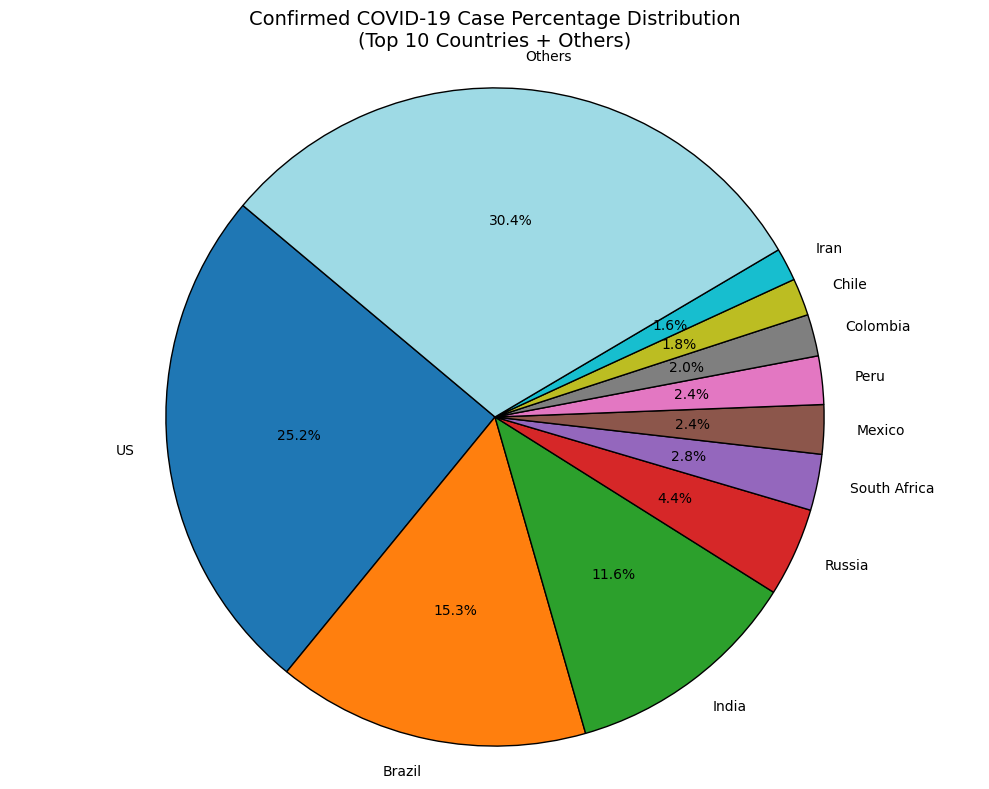

In [57]:

import matplotlib.cm as cm
# Step 1: Get latest date
latest_date = df_grouped['ObservationDate'].max()
latest_data = df_grouped[df_grouped['ObservationDate'] == latest_date].copy()

# Step 2: Calculate percentage of confirmed cases
total_confirmed = latest_data['Confirmed'].sum()
latest_data['Confirmed_Percentage'] = (latest_data['Confirmed'] / total_confirmed) * 100

# Step 3: Sort and group others
top_n = 10
latest_data_sorted = latest_data.sort_values(by='Confirmed_Percentage', ascending=False)
top_data = latest_data_sorted.head(top_n)
others_data = latest_data_sorted.tail(len(latest_data_sorted) - top_n)

others_row = pd.DataFrame({
    'Country_Region': ['Others'],
    'Confirmed_Percentage': [others_data['Confirmed_Percentage'].sum()]
})

final_data = pd.concat([top_data[['Country_Region', 'Confirmed_Percentage']], others_row], ignore_index=True)

# Step 4: Plot pie chart
num_slices = len(final_data)
colors = cm.get_cmap('tab20')(np.linspace(0, 1, num_slices))

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    final_data['Confirmed_Percentage'],
    labels=final_data['Country_Region'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Confirmed COVID-19 Case Percentage Distribution\n(Top 10 Countries + Others)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


**Line Plot of Cumulative Trends (Confirmed, Recovered, Deaths)**

In [58]:
# Sort by country and date
df_sorted = df_grouped.sort_values(['Country_Region', 'ObservationDate'])

# Calculate daily new values by group
df_sorted['Daily_Confirmed'] = df_sorted.groupby('Country_Region')['Confirmed'].diff().fillna(0)
df_sorted['Daily_Recovered'] = df_sorted.groupby('Country_Region')['Recovered'].diff().fillna(0)
df_sorted['Daily_Deaths'] = df_sorted.groupby('Country_Region')['Deaths'].diff().fillna(0)


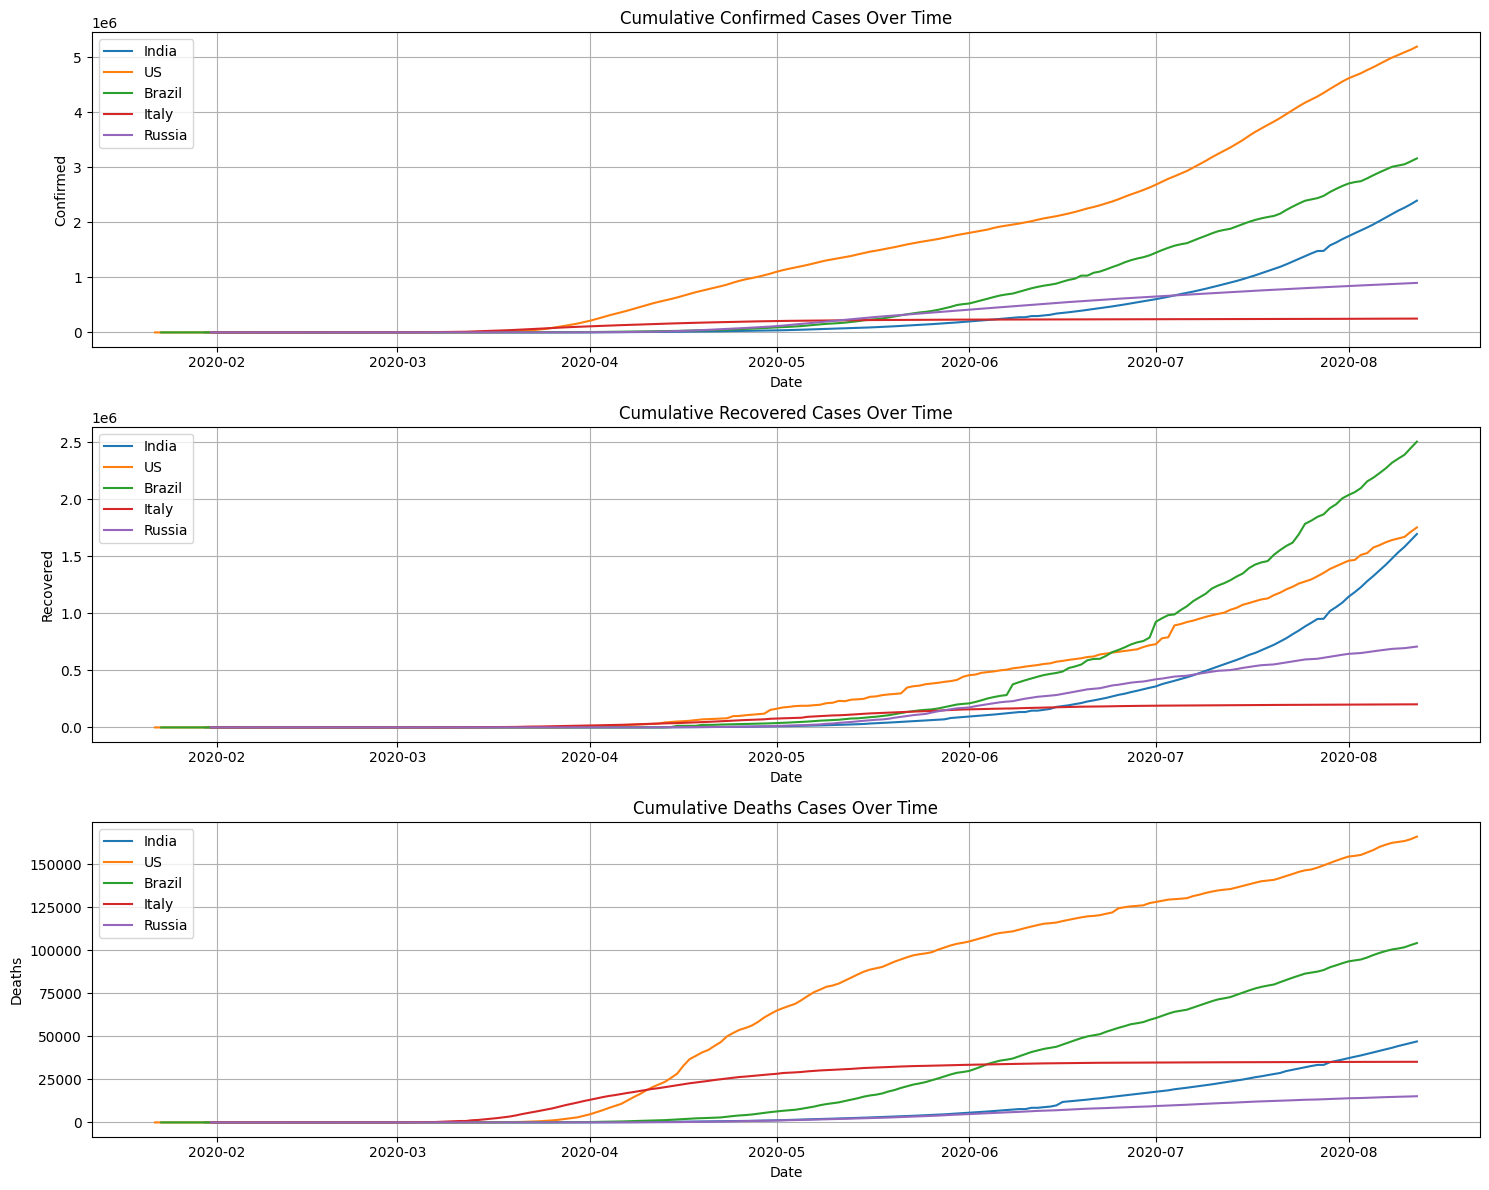

In [59]:
# Choosing countries to compare
selected_countries = ['India', 'US', 'Brazil', 'Italy', 'Russia']
metrics = ['Confirmed', 'Recovered', 'Deaths']
colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red

plt.figure(figsize=(15, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    for country in selected_countries:
        country_data = df_sorted[df_sorted['Country_Region'] == country]
        plt.plot(country_data['ObservationDate'], country_data[metric], label=country)
    plt.title(f'Cumulative {metric} Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


**Area Chart — Cumulative Trend for One Country**

visualize how Confirmed, Recovered, and Deaths have grown together over time for one country (like India).

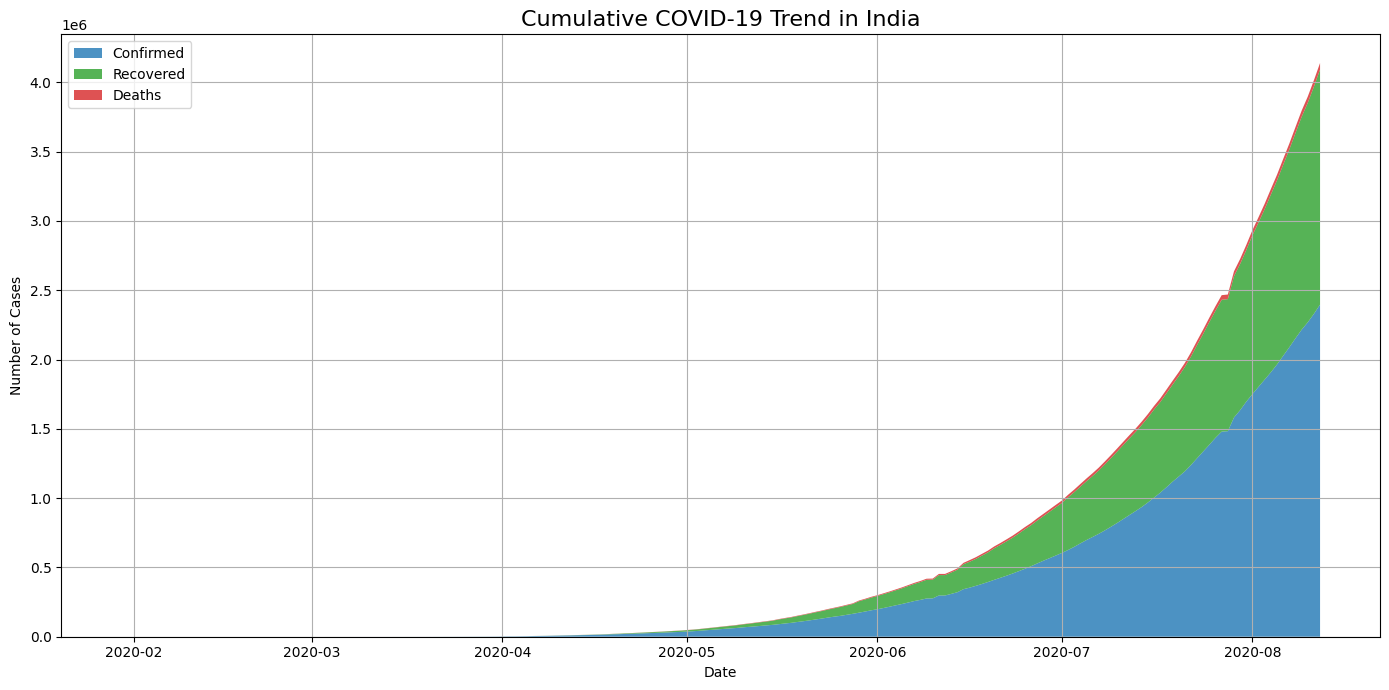

In [60]:
# Filter data for a single country (e.g., India)
country = 'India'
country_data = df_sorted[df_sorted['Country_Region'] == country]

# Plot stack area chart
plt.figure(figsize=(14, 7))
plt.stackplot(
    country_data['ObservationDate'],
    country_data['Confirmed'],
    country_data['Recovered'],
    country_data['Deaths'],
    labels=['Confirmed', 'Recovered', 'Deaths'],
    alpha=0.8,
    colors=['#1f77b4', '#2ca02c', '#d62728']
)

plt.title(f'Cumulative COVID-19 Trend in {country}', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


**Heatmap – Daily Deaths per Country**

visualize the daily number of deaths for top 10 affected countries, helping us spot surges and critical dates.

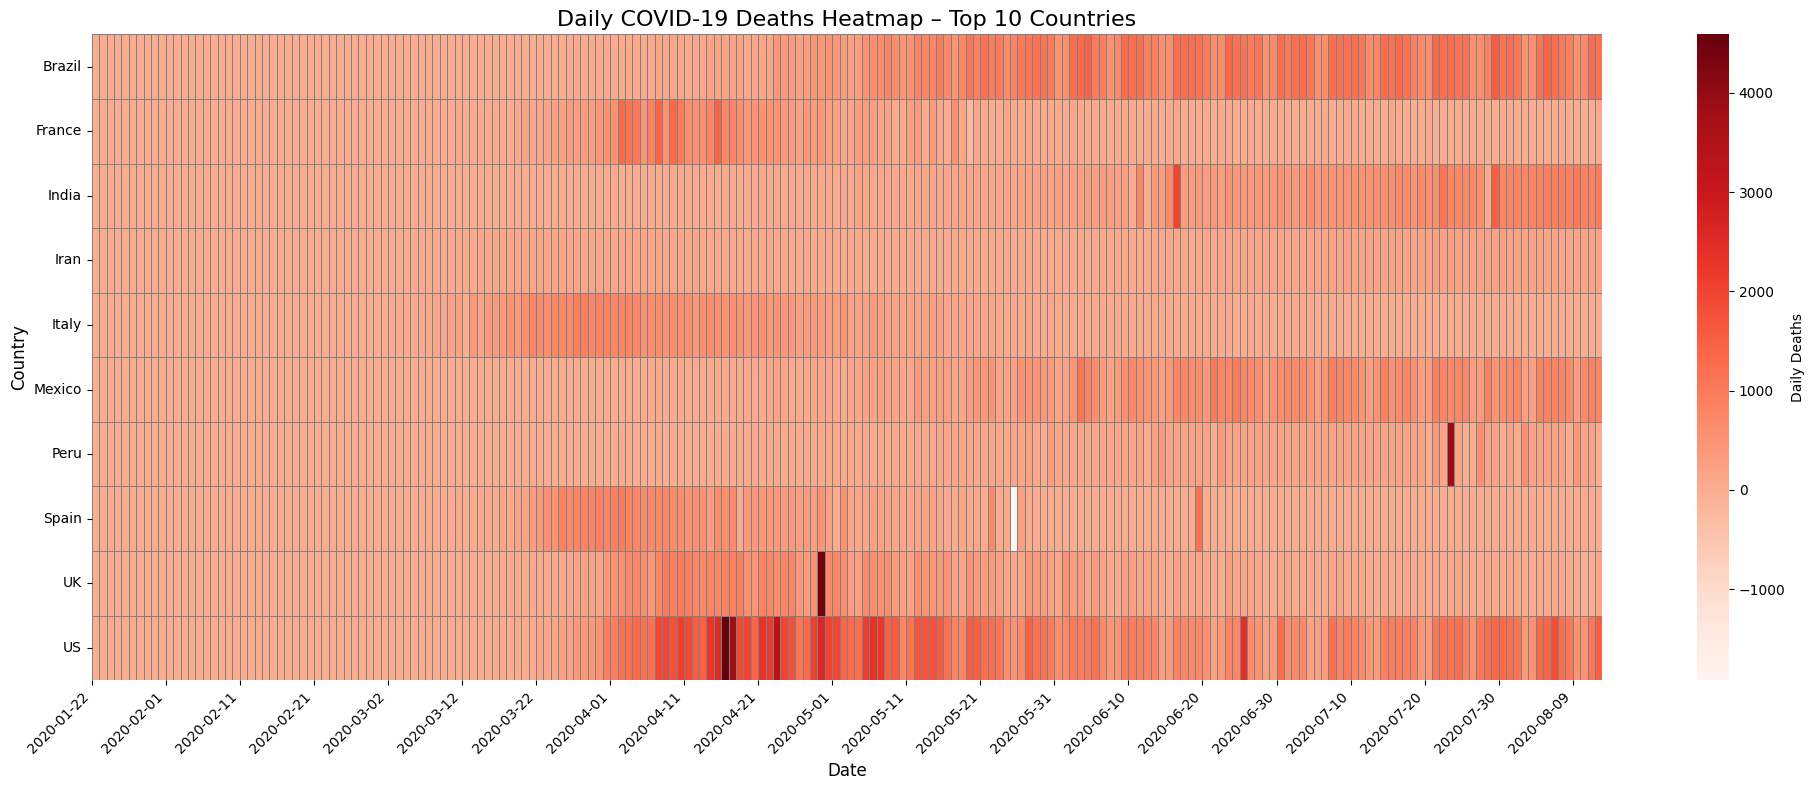

In [61]:
# Step 1: Get top 10 countries by total deaths
latest_date = df_sorted['ObservationDate'].max()
latest_totals = df_sorted[df_sorted['ObservationDate'] == latest_date]
top10 = latest_totals.sort_values(by='Deaths', ascending=False)['Country_Region'].head(10).tolist()

# Step 2: Filter data for those countries
df_top10 = df_sorted[df_sorted['Country_Region'].isin(top10)]

# Step 3: Pivot table – rows = countries, columns = dates, values = daily deaths
pivot_df = df_top10.pivot_table(
    index='Country_Region',
    columns='ObservationDate',
    values='Daily_Deaths',
    aggfunc='sum'
).fillna(0)

# Step 4: Format dates for clarity
pivot_df.columns = pd.to_datetime(pivot_df.columns).strftime('%Y-%m-%d')
xticks_to_show = pivot_df.columns[::10]  # Show every 10th day

# Step 5: Plot heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(
    pivot_df,
    cmap="Reds",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Daily Deaths'}
)

plt.title("Daily COVID-19 Deaths Heatmap – Top 10 Countries", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(ticks=np.arange(len(pivot_df.columns))[::10], labels=xticks_to_show, rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


 **Plotting global trends over time**

 To visualize the overall global trends of:

Confirmed cases

Recovered cases

Deaths

In [62]:

# Extract month period (e.g., 2020-03)
df['Month'] = df['ObservationDate'].dt.to_period('M')

# Group by month, get the maximum value (cumulative till that point)
monthly_cumulative = df.groupby('Month')[['Confirmed', 'Recovered', 'Deaths']].max().reset_index()

# Convert 'Month' to string for labeling
monthly_cumulative['Month'] = monthly_cumulative['Month'].astype(str)


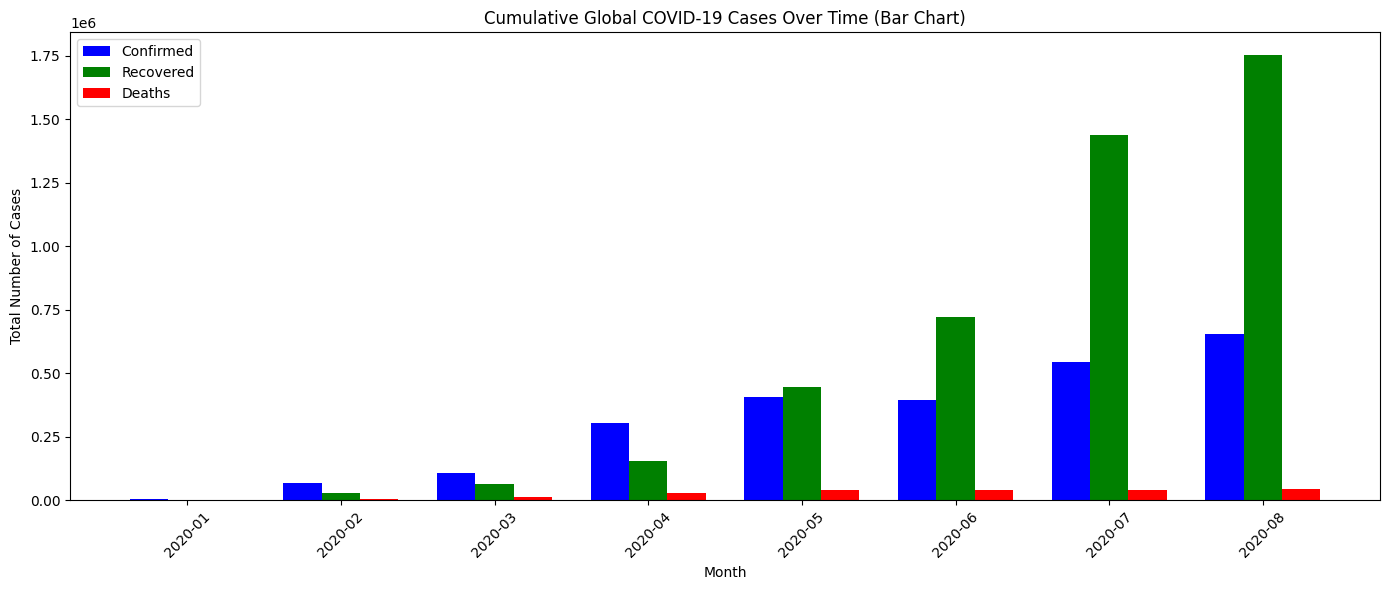

In [63]:

# Create x-axis positions
x = np.arange(len(monthly_cumulative['Month']))
width = 0.25

# Plot bars
plt.figure(figsize=(14, 6))
plt.bar(x - width, monthly_cumulative['Confirmed'], width=width, label='Confirmed', color='blue')
plt.bar(x, monthly_cumulative['Recovered'], width=width, label='Recovered', color='green')
plt.bar(x + width, monthly_cumulative['Deaths'], width=width, label='Deaths', color='red')

# Formatting
plt.title('Cumulative Global COVID-19 Cases Over Time (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Total Number of Cases')
plt.xticks(x, monthly_cumulative['Month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Cumulative COVID-19 Bar Chart Summary (Jan–Aug 2020)**

This COVID-19 chart shows how the world moved from panic to hope in just eight months.

Starting with almost no cases in January 2020, the blue bars representing confirmed cases began rising steadily each month as the virus spread across the globe. But the real story unfolds in green — recoveries.

At first, recovery numbers were small. But from May onward, they began to surge dramatically. By summer, the green bars towered over the blue ones, showing that more and more people were recovering — faster than new cases were rising.

What’s most reassuring is the red bars for deaths. They remained relatively small and consistent throughout the period, indicating that most people who got sick were recovering, not dying.

By August 2020, recoveries had clearly overtaken confirmed cases in size — a visual sign of how far we had come. From fear and uncertainty, the data tells a story of medical progress, resilience, and rising hope.